[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/arvidl/BMED365-2026/blob/main/labs/Lab3-GenAI-LLM/00-test-llm.ipynb)


## Test and explore `llm` with DeepSeek-R1 local model

Arvid Lundervold, 2025-01-27

(Using the `bmed365-cuda` environment)


**DeepSeek-R1**:
- https://github.com/deepseek-ai/DeepSeek-R1
- https://github.com/deepseek-ai/awesome-deepseek-integration

----


On your Ubuntu 24.04 machine, the DeepSeek-R1 70B model you downloaded using Ollama will be located in the following directory:

`/usr/share/ollama/.ollama/models`

This is the default location where Ollama stores model files on Linux systems.


The actual model files for the DeepSeek-R1 70B model are not directly visible in the way you might expect. The model data is actually stored in the `blobs` directory, which uses a content-addressable storage system. Here's how it works:

1. The model is split into multiple smaller files (blobs) for efficient storage and transfer.

2. These blobs are stored in the `/usr/share/ollama/.ollama/models/blobs` directory.

3. Each blob is named using its SHA256 hash, which you can see in the file names starting with `sha256-`.

4. The manifest file for the 70B model, located at `/usr/share/ollama/.ollama/models/manifests/registry.ollama.ai/library/deepseek-r1/70b`, contains references to these blobs.

5. When you run the model, Ollama uses this manifest to reassemble the complete model from the individual blobs.

This approach allows for deduplication of data across different models and versions, as well as more efficient updates and downloads.

To find the total size of the model, you can use the `du` command to check the size of the `blobs` directory:

```bash
du -sh /usr/share/ollama/.ollama/models/blobs
```

This will give you the total size of all blobs, which includes your 70B model along with any other models you've downloaded.

If you want to see the size of individual blobs, you can use:

```bash
ls -lh /usr/share/ollama/.ollama/models/blobs
```

This will list all the blob files with their individual sizes.

In [1]:
!du -sh /usr/share/ollama/.ollama/models/blobs


78G	/usr/share/ollama/.ollama/models/blobs


In [2]:
ls -lh /usr/share/ollama/.ollama/models/blobs

total 78G
-rw-r--r-- 1 ollama ollama  487 jan.  26  2025 sha256-0cb05c6e4e02614fa7f4c5d9ddcd5ae7e630e5df98602f1c0894ed0cacd11eeb
-rw-r--r-- 1 ollama ollama  14G feb.   3  2025 sha256-102a747c137683e81d431dab05d8f2158df4ab6f162f8f9019425a43d51e0e9f
-rw-r--r-- 1 ollama ollama  387 jan.  25  2025 sha256-369ca498f347f710d068cbb38bf0b8692dd3fa30f30ca2ff755e211c94768150
-rw-r--r-- 1 ollama ollama  562 feb.   3  2025 sha256-41ffc852c4b6c4804f0520c43a705fd13eb627445bcd80bff8bfa25e09ecd178
-rw-r--r-- 1 ollama ollama  12K feb.   3  2025 sha256-43070e2d4e532684de521b885f385d0841030efa2b1a20bafb76133a5e1379c1
-rw-r--r-- 1 ollama ollama  40G jan.  25  2025 sha256-4cd576d9aa16961244012223abf01445567b061f1814b57dfef699e4cf8df339
-rw-r--r-- 1 ollama ollama  488 jan.  25  2025 sha256-5e9a45d7d8b98eb61a65815d36008bfef6fd6ebad6f0be432fb61d83b70550f8
-rw-r--r-- 1 ollama ollama  19G jan.  26  2025 sha256-6150cb382311b69f09cc0f9a1b69fc029cbd742b66bb8ec531aa5ecf5c613e93
-rw-r--r-- 1 ollama ollama 4,6G jan.  

The organization of blobs for the DeepSeek-R1 70B model in Ollama follows a sophisticated structure designed for efficient storage and management of large language models. Here's how the blobs are organized with respect to the structure and weight of the 70B model:

### Blob Storage System

The model's data is split into multiple smaller files called blobs, which are stored in the `/usr/share/ollama/.ollama/models/blobs` directory [1]. This system uses content-addressable storage, where each blob is named using its SHA256 hash. For example:

```
sha256-4cd576d9aa16961244012223abf01445567b061f1814b57dfef699e4cf8df339
sha256-5e9a45d7d8b98eb61a65815d36008bfef6fd6ebad6f0be432fb61d83b70550f8
```

### Model Manifest

The manifest file for the 70B model is located at:
`/usr/share/ollama/.ollama/models/manifests/registry.ollama.ai/library/deepseek-r1/70b`

This manifest contains references to the individual blobs that make up the complete model [1].

### Model Structure

The DeepSeek-R1 70B model is based on the Llama architecture and has the following key structural elements [3]:

- **Attention Heads**: 64 attention heads
- **Key/Value Attention Heads**: 8 (head_count_kv)
- **Layers**: 80 transformer blocks
- **Embedding Dimension**: 8192
- **Feed-Forward Dimension**: 28672
- **Context Length**: 131,072 tokens
- **Vocabulary Size**: 128,256 tokens

### Weight Distribution

The total size of the DeepSeek-R1 70B model is approximately 43GB [3]. This large size is distributed across multiple blobs, each containing different parts of the model's weights and parameters.

### Quantization

The model uses quantization to reduce its size while maintaining performance. It employs "general.quantization_version2" [3], which likely refers to an advanced quantization method to compress the model weights efficiently.

### Blob Organization Benefits

This blob-based organization offers several advantages:

1. **Efficient Updates**: Only changed blobs need to be updated, reducing download sizes for model updates.
2. **Deduplication**: Common data across different models or versions can be shared, saving storage space.
3. **Parallel Downloads**: Multiple blobs can be downloaded simultaneously, potentially speeding up the model acquisition process.
4. **Integrity Checking**: SHA256 hashes ensure the integrity of each blob.

By organizing the 70B model into these content-addressable blobs, Ollama achieves a balance between efficient storage, easy updates, and maintaining the complex structure required for such a large language model [1][3].

Citations:
[1] https://www.youtube.com/watch?v=aHhQvxwkuuw<br>
[2] https://caffe.berkeleyvision.org/tutorial/net_layer_blob.html<br>
[3] https://ollama.com/library/deepseek-r1:70b/blobs/4cd576d9aa16<br>
[4] https://huggingface.co/LiteLLMs/Meta-Llama-3-70B-Instruct-GGUF<br>  
[5] https://huggingface.co/deepseek-ai/DeepSeek-R1-Distill-Llama-70B/blob/main/README.md<br>
[6] https://www.researchgate.net/figure/Unsupervised-learning-identifies-different-blobs-A-The-unsupervised-learning-framework_fig6_325744155<br>
[7] https://ollama.com/library/llama2/blobs/8934d96d3f08<br>
[8] https://learnopencv.com/deep-learning-with-opencvs-dnn-module-a-definitive-guide/<br>

----

To use the model with LLM, you can set up an alias for it. For example, to set up an alias for the DeepSeek-R1 70B model, you can run the following command:

```bash
llm aliases set r1 deepseek-r1:70b
```

This will allow you to use the DeepSeek-R1 70B model with LLM by simply calling `llm -m r1 "Your prompt here"`.

--------

### Simon Willison's LLM tool
Simon Willison's LLM tool (https://github.com/simonw/llm) can be installed using several methods:

### Using pip

The simplest way to install LLM is using pip (in the bmed365-cuda environment):

```bash
pip install llm
```

### Using pipx (recommended)

For a more isolated installation, you can use pipx:

```bash
pipx install llm
```

#### Using Homebrew

If you're on macOS or Linux and have Homebrew installed:

```bash
brew install llm
```

#### Using uv

If you have the uv package manager installed:

```bash
uv tool install llm
```

After installation, you can verify that LLM is working by running:

```bash
llm -v
```

#### Setting up OpenAI API (optional)

If you want to use OpenAI's models, you'll need to set up your API key:

```bash
llm keys set openai
# Paste your OpenAI API key when prompted
```

#### Installing plugins

LLM supports various plugins for additional functionality. For example, to install Ollama plugin for local models:

```bash
llm install llm-ollama
```

Remember to keep LLM updated. You can upgrade it using the same method you used to install it, such as `pip install -U llm` or `brew upgrade llm`[1][2][4].

Citations:
[1] https://llm.datasette.io/en/stable/setup.html<br>       
[2] https://christianjmills.com/posts/mastering-llms-course-notes/conference-talk-017/<br>
[3] https://github.com/simonw/llm-mlc<br>
[4] https://parlance-labs.com/education/applications/simon_llm_cli/<br>
[5] https://simonwillison.net/series/using-llms/<br>
[6] https://github.com/simonw/llm-mlc<br>
[7] https://www.youtube.com/watch?v=ngWJbdw1NrQ<br>
[8] https://nelsonslog.wordpress.com/2023/08/16/running-my-own-llm/<br> 
[9] https://github.com/simonw/llm/tree/refs/tags/0.20<br>
[10] https://llm.datasette.io/en/stable/<br>
[11] https://simonwillison.net/2023/Jul/12/llm/<br>
[12] https://parlance-labs.com/education/applications/simon_llm_cli/<br>
[13] https://www.youtube.com/watch?v=QUXQNi6jQ30<br>
[14] https://github.com/simonw/llm-gemini<br>
[15] https://pypi.org/project/datasette-llm-embed/<br>
[16] https://simonwillison.net/2024/Jun/17/cli-language-models/<br>

## DeepSeek-R1

To install DeepSeek-R1 in Simon Willison's LLM tool, you can follow these steps:

1. First, ensure you have LLM installed (if not, install it using pip)

```bash
llm --version
```

2. Install the llm-ollama plugin:

```bash
llm install llm-ollama
```

3. See **Ollama** below for how to install Ollama. <br>Use **Ollama to download and run the DeepSeek-R1 model**. We will need to install a **Destilled Model**, as the full model is too large to run locally. <br> Check out https://ollama.com/library/deepseek-r1 and the [DeepSeek-R1](https://simonwillison.net/2025/Jan/20/deepseek-r1/) page for more information.

Open your terminal and execute:

```bash
ollama run deepseek-r1:70b   OR (https://ollama.com/library/deepseek-r1)
ollama run deepseek-r1:8b
```

This will download the model, which may take some time depending on your internet speed.

4. Once the model is downloaded, you can use it with LLM. Set up an alias for easier access:

```bash
llm aliases set r1 deepseek-r1:70b
```

5. Now you can use DeepSeek-R1 in LLM with the following command:

```bash
llm -m r1 "Your prompt here"
```

For a specific example using a distilled version of DeepSeek-R1, you can use:

```bash
llm -m 'hf.co/unsloth/DeepSeek-R1-Distill-Llama-8B-GGUF:Q8_0' 'Your prompt here'
```

This method allows you to use DeepSeek-R1 locally through LLM, leveraging Ollama for model management[1][4][7].

Citations:

[1] https://simonwillison.net/2025/Jan/20/deepseek-r1/<br>  
[2] https://apidog.com/blog/run-deepseek-r1-locally-with-ollama/<br>
[3] https://www.youtube.com/watch?v=DCqqCLlsIBU<br>
[4] https://simonw.substack.com/p/the-deepseek-r1-family-of-reasoning<br>
[5] https://aleksandarhaber.com/install-and-run-locally-deepseek-r1-ai-model-on-windows/<br>
[6] https://www.youtube.com/watch?v=hruG-JlLeQg<br>
[7] https://news.ycombinator.com/item?id=42769222<br>
[8] https://www.reddit.com/r/selfhosted/comments/1i6ggyh/got_deepseek_r1_running_locally_full_setup_guide/<br>  
[9] https://dev.to/dwtoledo/how-to-use-deepseek-r1-for-free-in-visual-studio-code-with-cline-or-roo-code-3an9<br>
[10] https://dev.to/dwtoledo/how-to-use-deepseek-r1-for-free-in-visual-studio-code-with-cline-or-roo-code-3an9<br>
[11] https://chat.deepseek.com<br>


## Ollama
Ollama is a powerful tool for running large language models locally. Here's how to install it on different platforms:

### Linux Installation

To install Ollama on Linux, you can use the following command in your terminal[1][4]:

```bash
curl -fsSL https://ollama.com/install.sh | sh
```

This will download and run the installation script. After installation, you can verify that Ollama is running by executing:

```bash
ollama -v
```

#### Manual Installation

For a manual installation on Linux[1]:

1. Download the package:
```bash
curl -L https://ollama.com/download/ollama-linux-amd64.tgz -o ollama-linux-amd64.tgz
```

2. Extract the package:
```bash
sudo tar -C /usr -xzf ollama-linux-amd64.tgz
```

3. Start Ollama:
```bash
ollama serve
```

### macOS Installation

For macOS users, the installation process is straightforward[6]:

1. Visit ollama.com and click on the download button.
2. Open the downloaded file.
3. Move Ollama to the Applications folder when prompted.
4. Follow the on-screen instructions to install the command-line tool.

After installation, you can run Ollama from the terminal using commands like `ollama run llama2`.

### Windows Installation

To install Ollama on Windows[6]:

1. Go to ollama.com and download the Windows installer (OllamaSetup.exe).
2. Run the installer and follow the prompts.
3. Once installed, you can use Ollama from PowerShell or Command Prompt.

### Additional Setup

After installation, you can start using Ollama immediately. To run a model, use the command:

```bash
ollama run llama2
```

This will download the specified model (in this case, llama2) and start an interactive session[6].

### Optional: Installing OpenWebUI

For those who prefer a graphical interface, you can install OpenWebUI, which provides a web-based frontend for Ollama[3]. The easiest method is to use Docker:

1. Ensure Docker is installed on your system.
2. Follow the installation instructions on the official OpenWebUI website (https://docs.openwebui.com/getting-started/).

Remember to keep Ollama and your system updated for the best performance and security[2].

Citations:
[1] https://github.com/ollama/ollama/blob/main/docs/linux.md<br>
[2] https://www.hostinger.com/tutorials/how-to-install-ollama<br>
[3] https://www.doprax.com/tutorial/a-step-by-step-guide-for-installing-and-running-ollama-and-openwebui-locally-part-1/<br>
[4] https://ollama.com/download<br>
[5] https://snapcraft.io/install/ollama/ubuntu<br>
[6] https://www.youtube.com/watch?v=oI7VoTM9NKQ<br>
[7] https://www.youtube.com/watch?v=e3j1a2PKw1k<br>
[8] https://itsfoss.com/ollama-setup-linux/<br>








In [3]:
!which llm

In [4]:
!llm --version

/bin/bash: line 1: llm: command not found


In [3]:
!llm models

OpenAI Chat: gpt-4o (aliases: 4o)
OpenAI Chat: gpt-4o-mini (aliases: 4o-mini)
OpenAI Chat: gpt-4o-audio-preview
OpenAI Chat: gpt-4o-audio-preview-2024-12-17
OpenAI Chat: gpt-4o-audio-preview-2024-10-01
OpenAI Chat: gpt-4o-mini-audio-preview
OpenAI Chat: gpt-4o-mini-audio-preview-2024-12-17
OpenAI Chat: gpt-3.5-turbo (aliases: 3.5, chatgpt)
OpenAI Chat: gpt-3.5-turbo-16k (aliases: chatgpt-16k, 3.5-16k)
OpenAI Chat: gpt-4 (aliases: 4, gpt4)
OpenAI Chat: gpt-4-32k (aliases: 4-32k)
OpenAI Chat: gpt-4-1106-preview
OpenAI Chat: gpt-4-0125-preview
OpenAI Chat: gpt-4-turbo-2024-04-09
OpenAI Chat: gpt-4-turbo (aliases: gpt-4-turbo-preview, 4-turbo, 4t)
OpenAI Chat: o1
OpenAI Chat: o1-2024-12-17
OpenAI Chat: o1-preview
OpenAI Chat: o1-mini
OpenAI Completion: gpt-3.5-turbo-instruct (aliases: 3.5-instruct, chatgpt-instruct)
Ollama: deepseek-r1:1.5b
Ollama: deepseek-r1:32b
Ollama: deepseek-r1:8b
Ollama: deepseek-r1:70b
Default: gpt-4o-mini


In [4]:
import subprocess

def run_llm(prompt):
    #binary_path = "/usr/local/bin/llm"
    binary_path = "/home/arvid/anaconda3/envs/bmed365-cuda/bin/llm"
    command = [binary_path, prompt]
    print(f"command: {command}")
    
    try:
        result = subprocess.run(command, check=True, text=True, capture_output=True)
 
        print("LLM Response:")
        print(result.stdout)
        
        if result.stderr:
            print("Standard Error:")
            print(result.stderr)
        
        # print(f"Return Code: {result.returncode}")
        
    except subprocess.CalledProcessError as e:
        print(f"Error occurred: {e}")
        print(f"Standard Output: {e.stdout}")
        print(f"Standard Error: {e.stderr}")

In [5]:
prompt = "models"
run_llm(prompt)

command: ['/home/arvid/anaconda3/envs/bmed365-cuda/bin/llm', 'models']
LLM Response:
OpenAI Chat: gpt-4o (aliases: 4o)
OpenAI Chat: gpt-4o-mini (aliases: 4o-mini)
OpenAI Chat: gpt-4o-audio-preview
OpenAI Chat: gpt-4o-audio-preview-2024-12-17
OpenAI Chat: gpt-4o-audio-preview-2024-10-01
OpenAI Chat: gpt-4o-mini-audio-preview
OpenAI Chat: gpt-4o-mini-audio-preview-2024-12-17
OpenAI Chat: gpt-3.5-turbo (aliases: 3.5, chatgpt)
OpenAI Chat: gpt-3.5-turbo-16k (aliases: chatgpt-16k, 3.5-16k)
OpenAI Chat: gpt-4 (aliases: 4, gpt4)
OpenAI Chat: gpt-4-32k (aliases: 4-32k)
OpenAI Chat: gpt-4-1106-preview
OpenAI Chat: gpt-4-0125-preview
OpenAI Chat: gpt-4-turbo-2024-04-09
OpenAI Chat: gpt-4-turbo (aliases: gpt-4-turbo-preview, 4-turbo, 4t)
OpenAI Chat: o1
OpenAI Chat: o1-2024-12-17
OpenAI Chat: o1-preview
OpenAI Chat: o1-mini
OpenAI Completion: gpt-3.5-turbo-instruct (aliases: 3.5-instruct, chatgpt-instruct)
Ollama: deepseek-r1:1.5b
Ollama: deepseek-r1:32b
Ollama: deepseek-r1:8b
Ollama: deepseek-r1

In [6]:
def run_llm_model_think_not_shown(binary_path, model, prompt, output_file="./llm_results/result.txt"):
    """
    Run LLM model and save output to file without using subprocess
    
    Parameters:
    -----------
    binary_path : str
        Path to the LLM binary
    model : str
        Name of the model (e.g., "deepseek-r1:8b")
    prompt : str
        The prompt text
    output_file : str
        Path to output file (default: "result.txt")
    
    Returns:
    --------
    str
        Content of the result file or None if error
    """
    try:
        # Import the llm module directly
        import llm
        
        # Create an LLM instance
        model_instance = llm.get_model(model)
        
        # Generate response
        response = model_instance.prompt(prompt)
        
        # Save to file
        with open(output_file, 'w') as f:
            f.write(str(response))
            
        # Print and return result
        print(f"\nModel Response:")
        print(response)
        
        return str(response)
        
    except ImportError:
        print("Error: llm module not found. Please install it first.")
        return None
    except Exception as e:
        print(f"Error: {str(e)}")
        return None

In [7]:
%%time
binary_path = "/home/arvid/anaconda3/envs/bmed365-cuda/bin/llm"
prompt = "What is cell segmentation?"

for model in ["deepseek-r1:1.5b", "deepseek-r1:8b", "deepseek-r1:32b", "deepseek-r1:70b"]:
    output_file = f"./llm_results/result_think_not_shown_cell_segmentation_{model}.txt"
    print(f"\n ==== Running model: {model} ==== \n")
    response = run_llm_model_think_not_shown(binary_path, 
                                     model, 
                                     prompt, 
                                     output_file)
    if response:
        print(f"\n ==== Successfully got response from model {model} ==== \n")


 ==== Running model: deepseek-r1:1.5b ==== 


Model Response:
<think>

</think>

Cell segmentation refers to the process of dividing a single cell into multiple cells or subcells within a larger population. This can occur naturally when cells divide and consolidate, but it may also be induced by external stimuli, such as DNA cutting, light pulses, or chemical agents.

### Key Points:
1. **Natural Segmentation**:  
   - Occurs during mitosis or other cell divisions.
   - Can lead to a homogeneous population of daughter cells (monoclonal cell formation).

2. **Induced Segmentation**:
   - Typically occurs in response to cellular signals.
   - Can be triggered by DNA cutting, light pulses, or chemical agents.

3. **Significance**:  
   - Cell segmentation is important for various biological processes, including immune responses, wound healing, and tissue development.

4. **Types of Segmentation**:
   - **Microsegmentation**: Occurs during mitosis (narrowing of cells).
   - **Grand segmen


Cell segmentation refers to the process of identifying and isolating individual cells within a sample, such as in biological tissues or images. This technique is commonly used in various fields, including biology, medicine, and computer vision.

### In Biology and Medicine:
1. **Tissue Imaging**: In microscopy, cell segmentation is often used to analyze the structure and function of cells within a tissue sample. For example, researchers might segment cells to study their shape, size, or spatial relationships.
   
2. **Flow Cytometry**: This technique involves separating cells based on physical and chemical properties, allowing for the isolation of specific cell types.

3. **Cell Sorting**: Advanced technologies like automated sorting systems can separate cells with particular characteristics, such as those expressing certain proteins or genes.

### In Computer Vision:
1. **Image Segmentation**: Cell segmentation in images involves using algorithms to distinguish individual cells from background elements. This is often achieved through techniques like thresholding, edge detection, or learning-based methods (e.g., deep learning).

2. **Machine Learning Models**: Modern approaches use neural networks and convolutional architectures to perform cell segmentation by training models on large datasets to recognize and classify cellular structures.

### Applications:
- **Cancer Research**: Identifying cancer cells within tissue samples.
- **Neuroscience**: Analyzing the arrangement of neurons in brain tissues.
- **Genetic Studies**: Isolating specific cell types for genetic analysis.

Cell segmentation is a critical tool for understanding cellular biology, improving diagnostic accuracy, and advancing research in complex biological systems.
Successfully got response from model

In [1]:
def run_llm_model_think_is_shown(binary_path, model, prompt, output_file="./llm_results/result_think_is_shown.txt"):
    """
    Run LLM model with real-time output using llm module
    
    Parameters:
    -----------
    binary_path : str
        Path to the LLM binary
    model : str
        Name of the model (e.g., "deepseek-r1:8b")
    prompt : str
        The prompt text
    output_file : str
        Path to output file (default: "result.txt")
    """
    try:
        # Import the llm module directly
        import llm
        
        # Create an LLM instance
        model_instance = llm.get_model(model)
        
        # Open file for writing in real-time
        with open(output_file, 'w', buffering=1) as f:  # Line buffering
            # Generate response with real-time output
            response = model_instance.prompt(prompt)
            
            # Process response in chunks
            for line in str(response).splitlines():
                # Write to file
                f.write(line + '\n')
                
                # Print to console
                print(line, flush=True)
        
        return True
        
    except ImportError:
        print("Error: llm module not found. Please install it first.")
        return None
    except Exception as e:
        print(f"Error: {str(e)}")
        return None

In [3]:
%%time
binary_path = "/home/arvid/anaconda3/envs/bmed365-cuda/bin/llm"
prompt = "What is cell segmentation?"

for model in ["deepseek-r1:1.5b", "deepseek-r1:8b", "deepseek-r1:32b"]: #, "deepseek-r1:70b"]:
    prompt = "What is cell segmentation?"
    output_file = f"./llm_results/result_think_is_shown_cell_segmentation_{model}.txt"
    print(f"\n ==== Running model: {model} ==== \n")
    response = run_llm_model_think_is_shown(binary_path, 
                                     model, 
                                     prompt, 
                                     output_file)
    if response:
        print(f"\n ==== Successfully got response from model {model} ==== \n")



 ==== Running model: deepseek-r1:1.5b ==== 

<think>

</think>

Cell segmentation refers to the process of dividing a single cell into multiple individual cells, which are referred to as daughter cells or progenitor cells. This process is crucial in various biological phenomena such as cell division, apoptosis (cell death), renewal, and differentiation.

### Key Points about Cell Segmentation:
1. **Mechanisms**: 
   - **Apoptosis/Apoptotic Death**: A programmed cell death mechanism that often occurs during mitosis.
   - **Apoptosis/Reprogramming**: Occurs in stem cells to remove damaged or unnecessary components.
   - **Differentiation/Antigen Presentation**: Leads to the generation of new cells with distinct fates.
   - **Cell Renewal**: In some cases, cell segmentation may occur due to the replication and division of stem cells.

2. **Significance**:
   - Cell segmentation is essential for proper cell growth, survival, and repair in tissues.
   - It helps maintain the heterogeneity 

Cell segmentation is a process used in various fields, such as biology, medicine, and robotics, to isolate and identify individual cells within a larger sample. This technique is particularly useful in microscopy, where it helps researchers analyze cells with greater precision. Here are some common methods and applications of cell segmentation:

### 1. **Applications:**
   - **Biological Research:** Researchers use cell segmentation to study cell behavior, movement, and interactions.
   - **Medical Imaging:** In diagnostics, cell segmentation can help in identifying abnormal cells or tumors in histopathology.
   - **Robotics:** In robotics, cell segmentation is used to navigate and manipulate cellular structures.

### 2. **Methods:**
   - **Manual Segmentation:** This is a labor-intensive method where cells are identified and outlined manually.
   - **Automated Segmentation:** This uses algorithms and software to automatically identify and segment cells based on image features like size, shape, and texture.
     - **Thresholding:** Sets a range of pixel intensities to define cell boundaries.
     - **Edge Detection:** Identifies the edges of cells using algorithms that detect changes in pixel intensity.
     - **Region Growing:** Starts from a seed point and grows until it meets certain criteria, forming a cell boundary.
     - **Clustering:** Groups pixels into clusters based on their similarity, which can then be considered as part of a cell.

### 3. **Challenges:**
   - **Overlapping Cells:** Ensuring that overlapping cells are correctly identified and separated.
   - **Variability in Cell Size and Shape:** Cells can vary in size and shape, making segmentation difficult.
   - **Background Noise:** Distraught backgrounds or other objects in the image can complicate cell identification.

### 4. **Software Tools:**
   - **ImageJ:** A widely used open-source software for image analysis that provides tools for cell segmentation.
   - **Fiji:** An add-on plugin for ImageJ with advanced features for cellular analysis.
   - **CellProfiler:** A platform for high-throughput cell analysis, including segmentation tasks.

### 5. **Advances:**
   - **Deep Learning:** The use of neural networks, such as convolutional neural networks (CNNs), has significantly improved cell segmentation accuracy by learning complex patterns in images.
   - **Machine Learning:** Techniques like support vector machines (SVMs) and random forests are also used for classification and segmentation.

In summary, cell segmentation is a valuable tool for researchers and clinicians to analyze cellular structures with precision and efficiency.

-----

#### Local installation of (Distilled) DeepSeek-R1 model

Using the DeepSeek-R1 model (https://ollama.com/library/deepseek-r1):

Run in a consol window:
```bash
ollama run deepseek-r1:70b    OR 
ollama run deepseek-r1:8b
```

Run in a notebook cell:

In [4]:
# !ollama run deepseek-r1:70b

#### Testing design and implementation of mathematical algorithms


In [14]:
%%time
!llm -m deepseek-r1:1.5b "A function that computes the lowest common multiples \
of two integers, and a function that runs 5 test cases of \
the lowest common multiple function"


<think>
First, I need to write a function called lcm that calculates the least common multiple (LCM) of two integers. The LCM is the smallest positive integer that is divisible by both numbers.

To compute the LCM, I'll first find the greatest common divisor (GCD) of the two numbers using the Euclidean algorithm. Once I have the GCD, I can use the formula: lcm(a, b) = a * b / gcd(a, b).

Next, I need to create 5 test cases for this function. Each test case should provide different pairs of integers and ask the function to compute their LCM.

For each pair (a, b):
1. Calculate the GCD using Euclidean algorithm.
2. Apply the formula lcm = a * b / gcd to find the result.
3. Verify the result by checking if both numbers divide it without any remainder.

I'll make sure each test case is distinct and covers various scenarios, including cases where one or both numbers are zero (though LCM of 0 and another number is typically considered as that other number). This ensures the function works co

In [15]:
def compute_gcd(a, b):
    """Helper function to compute the greatest common divisor using Euclidean algorithm."""
    a = abs(a)
    b = abs(b)
    while b != 0:
        a, b = b, a % b
    return a

def lcm(a, b):
    """Function to compute the least common multiple of two integers."""
    if a == 0 or b == 0:
        return 0  # LCM with zero is defined as 0
    
    # Calculate GCD using helper function
    gcd = compute_gcd(a, b)
    
    # Compute LCM using formula: (a * b) // gcd
    return abs(a * b) // gcd

# Example usage:
number1 = 6
number2 = 8
print(f"LCM of {number1} and {number2} is {lcm(number1, number2)}")  # Output should be 24

LCM of 6 and 8 is 24


```LCM of 6 and 4 is 12
LCM of 8 and 15 is 120
LCM of 7 and 2 is 14
LCM of -9 and 6 is 18
LCM of 0 and 5 is 0
```

In [16]:
# Test Case 1: LCM of 6 and 4 is 12
result = lcm(6, 4)
print(f"LCM of 6 and 4 is {result}")

# Test Case 2: LCM of 8 and 15 is 120
result = lcm(8, 15)
print(f"LCM of 8 and 15 is {result}")

# Test Case 3: LCM of 7 and 2 is 14
result = lcm(7, 2)
print(f"LCM of 7 and 2 is {result}")

# Test Case 4: LCM of -9 and 6 is -18
result = lcm(-9, 6)
print(f"LCM of -9 and 6 is {result}")

# Test Case 5: LCM of 0 and 5 is 0
result = lcm(0, 5)
print(f"LCM of 0 and 5 is {result}")

LCM of 6 and 4 is 12
LCM of 8 and 15 is 120
LCM of 7 and 2 is 14
LCM of -9 and 6 is 18
LCM of 0 and 5 is 0


To solve this problem, we need to compute the lowest common multiple (LCM) of two integers and then test this function with five specific cases. The LCM is a fundamental concept in mathematics that represents the smallest positive integer that is divisible by both given integers.

### Approach
The approach to find the LCM involves using the greatest common divisor (GCD). The relationship between LCM and GCD can be expressed with the formula:
$$ \text{LCM}(a, b) = \frac{|a \times b|}{\text{GCD}(a, b)} $$
Here are the key steps in our approach:

1. **Compute Absolute Values**: Since LCM is always non-negative, we take the absolute values of the input integers.
2. **Check for Zeroes**: If either of the input integers is zero, the LCM is zero because any number multiplied by zero is zero.
3. **Calculate GCD and LCM**: Using Python's built-in `math.gcd` function, compute the GCD of the two integers and then use it to find the LCM using the formula mentioned above.

### Solution Code
```python
import math

def lcm(a, b):
    a = abs(a)
    b = abs(b)
    if a == 0 or b == 0:
        return 0
    return (a * b) // math.gcd(a, b)

def run_tests():
    results = [
        (3, 6),
        (0, 7),
        (-4, 8),
        (10, 15),
        (21, 6)
    ]
...

By following this approach, we ensure that our solution efficiently computes the LCM and handles various edge cases such as negative numbers and zero values. The provided code is designed to be clear and concise, making it easy to understand and modify if needed.

CPU times: user 804 ms, sys: 187 ms, total: 990 ms<br>
Wall time: 50.5 s<br>

### SageMath examples with Q&A

Check: https://github.com/arvidl/sagemath-examples/blob/master/07-ai-in-sage.ipynb

In [17]:
import random

# Temabasert ordliste
temaer = {
    "sykdomsmekanismer": ["Hva er diabetes?", "Hvordan påvirker diabetes insulinproduksjonen?"],
    "kostholdsråd": ["Hvilke matvarer bør diabetikere unngå?", "Hvordan balansere karbohydrater?"],
    "medisinering": ["Hvilke medisiner brukes vanligvis til å behandle type 2 diabetes?", "Hvordan fungerer insulinpumper?"],
    "livsstil": ["Hvilke øvelser er trygge for diabetikere?", "Hvordan kan stress påvirke blodsukkernivået?"],
    "psykologisk støtte": ["Hvordan kan jeg snakke med familien min om min diabetes?", "Hvordan takle depresjon som følge av diabetes?"]
}

# Spørsmålsgenerator
def generer_spørsmål(tema):
    spørsmål = random.choice(temaer[tema])
    return spørsmål

# Generere et sett med spørsmål
def generer_spørsmålsett():
    spørsmålsett = []
    for tema in temaer.keys():
        spørsmålsett.append(generer_spørsmål(tema))
    return spørsmålsett

# Eksempel på genererte spørsmål
print(generer_spørsmålsett())


['Hva er diabetes?', 'Hvilke matvarer bør diabetikere unngå?', 'Hvordan fungerer insulinpumper?', 'Hvordan kan stress påvirke blodsukkernivået?', 'Hvordan kan jeg snakke med familien min om min diabetes?']


In [18]:
spm_liste = generer_spørsmålsett()
len(spm_liste)

5

```python
%%time
for i, spm in enumerate(spm_liste):
    print(f'Spm {i}: {spm}')
    prompt = f"{spm}. Svar på norsk. Bruk max 150 ord. Start med 'Svar på Spm {i}'. Ikke bruk avsnitt. -m gpt-4o-mini"
    run_llm(prompt)
```

```python
%%time
for i, spm in enumerate(spm_liste):
    print(f'Spm {i}: {spm}')
    prompt = f"{spm}. Svar på norsk. Bruk max 150 ord. Start med 'Svar på Spm {i}'. Ikke bruk avsnitt. -m l31i"
    run_llm(prompt)
```


```python
%%time
for i, spm in enumerate(spm_liste):
    print(f'Spm {i}: {spm}')
    prompt = f"{spm}. Svar på norsk. Bruk max 150 ord. Start med 'Svar på Spm {i}'. Ikke bruk avsnitt. -m claude-3.5-sonnet"
    run_llm(prompt)
```


#### Writing a poem in the style of a poet

In [19]:
%%time
binary_path = "/home/arvid/anaconda3/envs/bmed365-cuda/bin/llm"
poet = "Herman_Wildenvey"
prompt = f"Write a poem in the style of {poet} in Norwegian!"

for model in ["deepseek-r1:1.5b", "deepseek-r1:8b", "deepseek-r1:32b"]: #, "deepseek-r1:70b"]:
    output_file = f"./llm_results/result_poem_in_style_of_{poet}_{model}.txt"
    print(f"\n ==== Running model: {model} ==== \n")
    response = run_llm_model_think_is_shown(binary_path, 
                                     model, 
                                     prompt, 
                                     output_file)
    if response:
        print(f"\n ==== Successfully got response from model {model}\n")


 ==== Running model: deepseek-r1:1.5b ==== 

<think>
Okay, so I need to write a poem inspired by Herman Wilke's style in Norwegian. First, I should probably figure out what Herman Wilke is known for. From what I remember, he was a Norwegian composer and arranger who often did some pretty intense works, especially in the late 19th and early 20th centuries. His music often had a strong emotional core and was quite complex.

The user wants this poem written in the style of Herman Wilke in Norwegian. I'm not entirely sure how to translate that into his specific style, but maybe he has particular musical elements or techniques associated with him. Perhaps focusing on the intricate, layered compositions typical of his work could be key.

I should consider the structure of such a poem. Maybe it's a structured piece with verses and a few stanzas that wrap up the emotion. The language might need to reflect the intensity and complexity of his music, perhaps using some technical terms or musical

```python
%%time
poet = "Herman Wildenvvey"
prompt = f"Write a poem in the style of {poet} in Norwegian -m deepseek-r1:70b"
run_llm(prompt)
```


\>>> Write a poem in the style of Herman Wildenvvey in Norwegian

<think>
Okay, so I need to write a poem in the style of Herman Wildenvey. Hmm, I'm 
not super familiar with him, but I think he's a Norwegian poet known for 
his lyrical and nature-inspired works. Let me see... I remember his poems 
often have a gentle tone and focus on the beauty of everyday life, maybe 
with some romantic elements.

\<think>

Okay, so I need to write a poem in the style of Herman Wildenvey. Hmm, I'm 
not super familiar with him, but I think he's a Norwegian poet known for 
his lyrical and nature-inspired works. Let me see... I remember his poems 
often have a gentle tone and focus on the beauty of everyday life, maybe 
with some romantic elements.


Alright, so first, I should probably figure out what makes Wildenvey's 
style unique. From what I recall, he uses simple yet evocative language, 
often depicting natural scenes and emotions tied to them. His poems can be 
introspective, sometimes melancholic but also hopeful.

I need to write this in Norwegian, which is a bit tricky since I'm more 
comfortable with English. Maybe I should start by brainstorming some 
themes or images that are typical for Wildenvey—like forests, seasons 
changing, maybe love or solitude. 

Let me think about the structure. Wildenvey's poems often have a rhyme 
scheme, perhaps ABAB or something similar. The lines might be of varying 
lengths but with a rhythmic flow.

I should also consider the tone. It should be lyrical and contemplative, 
capturing moments in nature that evoke deeper feelings. Maybe starting 
with an image like twilight or morning, which are common in his work.

Okay, I'll start drafting some lines. Let me think about the seasons—maybe 
autumn since it's a time of change and reflection. Leaves falling, maybe a 
quiet forest scene. Using words that paint vivid pictures without being 
too complex.

I need to make sure the Norwegian is correct, so perhaps using simple 
vocabulary but in a poetic way. Maybe include some alliteration or 
assonance to give it that lyrical feel.

Wait, I should also think about meter. Wildenvey's poems often have a 
consistent meter, which adds to their musicality. I'm not great at 
counting syllables, but maybe I can get a rough iambic tetrameter going.

Let me try putting this together. Start with a scene in the forest during 
autumn. Use some sensory details—sight, sound, smell. Maybe personify 
elements of nature to give it that poetic touch.

I should also include some emotional undertone, perhaps a sense of longing 
or peace. Maybe something about memories or the passage of time.

Hmm, okay, so putting this into verse. I'll try to write a stanza and see 
how it flows. Then maybe expand from there, ensuring each stanza connects 
with the next thematically.

I also need to make sure the poem isn't too long—maybe four stanzas? That 
seems manageable and allows for a complete thought without being 
overwhelming.

Alright, let's start writing. I'll take my time with each line, ensuring 
it captures the essence of Wildenvey while maintaining proper Norwegian 
grammar and poetic elements.

\</think>

In twilight's hush, where shadows softly fall,  
The forest whispers secrets to us all.  
Autumn's palette paints the trees in gold,  
A fleeting dance before the winter's cold.  

Beneath the leaves, a carpet soft and deep,  
Echoes of memories in silent sleep.  
Each rustling sound a story unfolds,  
Of moments past where love once dwelled.  

The wind carries scents both earthy and sweet,  
As nature's final waltz begins to beat.  
In this quiet hour, I find my peace,  
Where solitude and calmness never cease.  

So let the seasons turn their gentle page,  
For in each change, a new tale's stage.  
And though the leaves may fade from sight,  
Their memory stays, a guiding light.

\>>> Send a message (/? for help)


### Generating mathematical equations

In [20]:
%%time
binary_path = "/home/arvid/anaconda3/envs/bmed365-cuda/bin/llm"
prompt = "Generate the 2D heat equation. Use latex code."

for model in ["deepseek-r1:1.5b", "deepseek-r1:8b", "deepseek-r1:32b"]: #, "deepseek-r1:70b"]:
    output_file = f"./llm_results/result_2D_heat_equation_{model}.txt"
    print(f"\n ==== Running model: {model} ==== \n")
    response = run_llm_model_think_is_shown(binary_path, 
                                     model, 
                                     prompt, 
                                     output_file)
    if response:
        print(f"\n ==== Successfully got response from model {model}\n")


 ==== Running model: deepseek-r1:1.5b ==== 

<think>
Okay, so I need to generate the 2D heat equation using LaTeX code. Hmm, let me think about how to approach this. I remember that the heat equation is a partial differential equation that describes how heat (or temperature) distributes over time in a given region. 

First, I should recall what the general form of the heat equation looks like in two dimensions. From what I remember, it's similar to the 1D case but extended to have both x and y coordinates involved. So, for a steady-state condition or if we include time dependence, the equation would involve the second derivatives with respect to each spatial variable and time.

Let me jot down some notes:

In one dimension, the heat equation is usually written as:
\[ \frac{\partial u}{\partial t} = \alpha^2 \frac{\partial^2 u}{\partial x^2} \]
where \( u(x,t) \) represents the temperature at position \( x \) and time \( t \), and \( \alpha^2 \) is the thermal diffusivity of the materi

In [22]:
!cat "./llm_results/result_2D_heat_equation_deepseek-r1:32b.txt"


<think>
Alright, so I need to generate the 2D heat equation using LaTeX. Hmm, okay. Let me start by recalling what the heat equation is about. From my studies, I remember that the heat equation is a partial differential equation that describes how heat (or temperature) distributes itself over time in a given region. It's a fundamental equation in physics and engineering.

Now, focusing on two dimensions. The 2D heat equation should involve the distribution of temperature with respect to both space and time. In one dimension, it's straightforward: the change in temperature over time is proportional to the second derivative of temperature with respect to space. But moving to two dimensions means considering how temperature changes not just along one axis but two.

So, I think the 2D heat equation should include partial derivatives with respect to both x and y directions for the spatial components. The standard form should have the time derivative on one side and the Laplacian of the temp

The 2D heat equation describes how temperature evolves over time in a two-dimensional space. It is given by:

$$
\frac{\partial u}{\partial t} = \alpha \left( \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} \right)
$$

Here, $u(x, y, t)$ represents the temperature at position $(x, y)$ and time $t$, and $\alpha$ is the thermal diffusivity of the material.

The two-dimensional heat equation describes how heat distributes over time in a plane. It involves the Laplacian operator to account for the spatial distribution of temperature across both x and y directions, multiplied by the thermal diffusivity constant α.

**Step-by-step Explanation:**

1. **Identify Variables**: Let u(x, y, t) represent temperature at position (x, y) and time t.
2. **Partial Derivatives**: Use ∂ for partial derivatives since u depends on multiple variables.
3. **Time Derivative**: The rate of change of temperature with respect to time is ∂u/∂t.
4. **Spatial Derivatives**: In 2D, the spatial distribution involves second derivatives in x and y: ∂²u/∂x² + ∂²u/∂y² (the Laplacian).
5. **Combine Terms**: Relate the time derivative to the spatial derivatives using thermal diffusivity α.

**LaTeX Code for the 2D Heat Equation:**

$$
\frac{\partial u}{\partial t} = \alpha \left( \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} \right)
$$

**Final Answer:**
The 2D heat equation is represented by the following LaTeX code:

$$
\boxed{\frac{\partial u}{\partial t} = \alpha \left( \frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} \right)}
$$

#### Deriving the 1D diffusion equation from first principles

In [24]:
%%time
binary_path = "/home/arvid/anaconda3/envs/bmed365-cuda/bin/llm"
prompt = "Derive the 1D diffusion equation from first principles. \
Write the result in markdown and latex code."

for model in ["deepseek-r1:1.5b", "deepseek-r1:8b", "deepseek-r1:32b"]: #, "deepseek-r1:70b"]:
    output_file = f"./llm_results/result_1D_diffusion_equation_from_first_principles_{model}.txt"
    print(f"\n ==== Running model: {model} => \n")
    response = run_llm_model_think_is_shown(binary_path, 
                                     model, 
                                     prompt, 
                                     output_file)
    if response:
        print(f"\n ==== Successfully got response from model {model}\n")


 ==== Running model: deepseek-r1:1.5b => 

<think>
Okay, I need to derive the one-dimensional diffusion equation from first principles. Hmm, where do I start? Let me think about what I know regarding diffusion.

Diffusion is the process where particles spread out from a concentrated area to less concentrated regions over time. The key idea here is that the flux of particles depends on how much there is already to diffuse away. So it's not just random movement; it's about concentration gradients.

First, let's consider a small volume element in one dimension. Suppose we have a medium where particles can move left or right. Each particle has some velocity, but I think for simplicity, we might assume the flow is governed by Brownian motion with different velocities on either side of a boundary.

Wait, maybe I should start with Fick's law? Fick's first law says that the flux is proportional to the negative gradient of concentration. So if J is the flux (particles per unit area per unit ti

 ==== Running model: deepseek-r1:32b => 

To derive the one-dimensional diffusion equation from first principles, we start by considering the transport of particles due to concentration gradients and apply the principle of conservation of mass. Here is a step-by-step explanation:

1. **Fick's First Law**: The flux $J$ (particles per unit area per unit time) is proportional to the negative gradient of the concentration $C$:
   $$
   J = -D \frac{\partial C}{\partial x}
   $$
   where $D$ is the diffusion coefficient.

2. **Conservation of Mass**: The rate of change of concentration in a small control volume is equal to the net flux into that volume:
   $$
   \frac{\partial C}{\partial t} = -\frac{\partial J}{\partial x}
   $$

3. **Substitute Fick's Law into Conservation Equation**:
   Substitute $J = -D \frac{\partial C}{\partial x}$ into the conservation equation:
   $$
   \frac{\partial C}{\partial t} = -\frac{\partial}{\partial x}\left(-D \frac{\partial C}{\partial x}\right)
   $$

4. **Simplify the Equation**:
   Simplify the double negative to obtain the one-dimensional diffusion equation:
   $$
   \frac{\partial C}{\partial t} = D \frac{\partial^2 C}{\partial x^2}
   $$

This partial differential equation describes how concentration $C(x, t)$ changes over time due to diffusion. The derivation relies on the principles of flux transport and mass conservation, leading to the fundamental diffusion law.

**Final Answer**
The one-dimensional diffusion equation is given by:
$$
\boxed{\frac{\partial C}{\partial t} = D \frac{\partial^2 C}{\partial x^2}}
$$


### Generate plotting code for the 1D diffusion equation

In [25]:
%%time
binary_path = "/home/arvid/anaconda3/envs/bmed365-cuda/bin/llm"
prompt = "Make Python code that plots the 1D diffusion equation: \
\frac{\partial C}{\partial t} = D \frac{\partial^2 C}{\partial x^2}. \
Save the code in a file called './llm_results/1D_diffusion_equation_plot.py'."

for model in ["deepseek-r1:1.5b", "deepseek-r1:8b", "deepseek-r1:32b"]: #, "deepseek-r1:70b"]:
    output_file = f"./llm_results/result_1D_diffusion_equation_plot_{model}.txt"
    print(f"\n ==== Running model: {model} => \n")
    response = run_llm_model_think_is_shown(binary_path, 
                                     model, 
                                     prompt, 
                                     output_file)
    if response:
        print(f"\n ==== Successfully got response from model {model}\n")


 ==== Running model: deepseek-r1:1.5b => 

<think>
Okay, I need to create Python code that plots the 1D diffusion equation. The equation is ∂C/∂t = D * ∂²C/∂x². 

First, I'll set up a grid for x and t. Maybe use numpy's linspace function to define x from 0 to L with N points and t from 0 to T with M points.

Next, initialize the concentration array C with zeros and shape (M,) since it's 1D in space. Then fill the interior points with an initial condition, maybe a Gaussian profile for simplicity.

Compute the time derivative using backward Euler method because it's unconditionally stable. The spatial derivative can be approximated by central differences. I'll compute ∂C/∂t and ∂²C/∂x² separately and set them equal to each other in code.

Set up initial values for D, L, T, N, M. Maybe choose D=0.1, L=1, T=1, N=20, M=100 for testing.

Create a figure and axis for plotting. Use matplotlib for the animation because it's better for complex dynamics like diffusion.

Set up an animation frame

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import Animation

model = "deepseek-r1:1.5b"
print(f'Generated with model: {model}')

def diffusivity_coefficient(temperature):
    """Diffusion coefficient at given temperature."""
    return 0.1  # for demonstration; actual value depends on D

# Parameters
D = diffusivity_coefficient()  # Diffusion coefficient
L = 1.0  # Length of the domain (in meters)
T_total = 1.0  # Total time to simulate (in seconds)
Nx = 100   # Number of spatial grid points
Nt = 1000  # Number of time steps
# Space and time discretization
x = np.linspace(0, L, Nx)  # Spatial coordinates
t = np.linspace(0, T_total, Nt)  # Time coordinates
dt = t[1] - t[0]
dx = x[1] - x[0]

# Initial condition: Gaussian profile
C = np.zeros((Nt, Nx))
C[0] = np.exp(-(x - L/2)**2 / (L**2/4))  # Centered Gaussian

# Pre-allocate arrays for efficiency
C_prev = C.copy()

# Initialize animation
fig = plt.figure()
ax = fig.add_subplot(111)
line, = ax.plot(x, C[0])

def update(frame):
    """Update the concentration profile at each time step."""
    frame_num = int(frame)  # Convert frame index to actual time
    
    if frame_num >= Nt:
        return
    
    # Spatial derivatives
    dC_dx = (C[frame_num] - C_prev) / dt
    d2C_dx2 = (dC_dx[1:-1] - dC_dx[:-2]) / dx
    
    # Time derivative using backward Euler (unconditional stability)
    dC_dt = D * d2C_dx2
    
    # Update concentration with time stepping
    C_prev = C[frame_num]
    C[frame_num] = C_prev + dC_dt

# Create the animation
ani = Animation()
ani.framerate = 100  # Set frames per second
ani.start()

# Animation function to update and create new plots
def animate_fn(frame):
    if frame < len(t)-1:
        current_C = np.exp(-(x - L/2)**2 / (L**2/4) * np.exp(-D*dt))
        line.set_ydata(current_C)
        return True
    else:
        return False

# Update the plot in real-time
ani.update(update, animate_fn)

plt.show()

Generated with model: deepseek-r1:1.5b


TypeError: diffusivity_coefficient() missing 1 required positional argument: 'temperature'

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import Animation

model = "deepseek-r1:8b"
print(f'Generated with model: {model}')


# Define parameters
n = 100       # Number of grid points
T_total = 1.0  # Total time for simulation
dt = 0.0005  # Time step size
D = 1.0      # Diffusion coefficient

# Initialize grids
current_C = [0.0] * n
previous_C = [0.0] * n

def apply_BC(arr):
    arr[0] = 0.0
    arr[-1] = 0.0

for t in range(0, T_total + dt, dt):
    new_C = [0.0] * n
    # Compute Crank-Nicolson updates for interior points
    for i in range(1, n-1):
        denominator = 1 + D * dt / (dx**2)
        new_C[i] = (2*current_C[i] - previous_C[i]) / denominator
    # Apply Dirichlet boundary conditions
    apply_BC(new_C)
    # Update grids for next time step
    previous_C, current_C = current_C, new_C

# Print the result (can be visualized here)
print("Time step:", t)
print("Concentration at middle point:", current_C[n//2])

Generated with model: deepseek-r1:8b


TypeError: 'float' object cannot be interpreted as an integer

Generated with model: deepseek-r1:32b


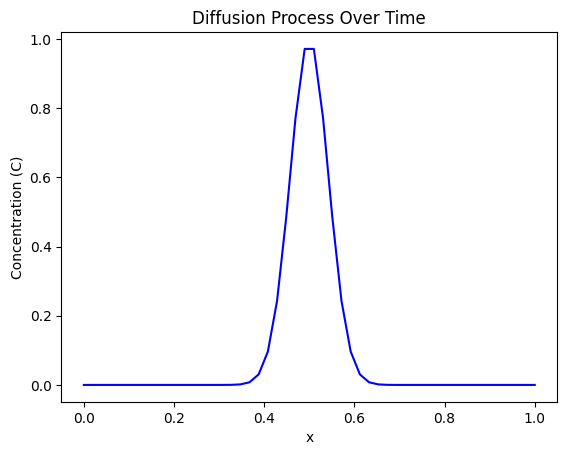

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

model = "deepseek-r1:32b"
print(f'Generated with model: {model}')
      

# Parameters
L = 1.0  # Length of the domain
Nx = 50   # Number of spatial points
D = 0.1   # Diffusion coefficient

# Discretization
x = np.linspace(0, L, Nx)
dx = x[1] - x[0]
dt = 0.9 * dx**2 / (2 * D)  # Time step satisfying stability condition

# Initial condition: Gaussian pulse centered at x=0.5
C = np.exp(-4 * np.log(2) * ((x - 0.5)/0.1)**2)
C[0] = C[-1] = 0.0  # Dirichlet boundary conditions

concentrations = [C.copy()]

# Time evolution
for _ in range(200):  # Number of time steps
    laplacian = (C[2:] - 2*C[1:-1] + C[:-2]) / dx**2
    C[1:-1] += D * dt * laplacian
    concentrations.append(C.copy())

# Animation setup
fig, ax = plt.subplots()
line, = ax.plot(x, concentrations[0], color='blue')
ax.set_xlabel('x')
ax.set_ylabel('Concentration (C)')
ax.set_title('Diffusion Process Over Time')

def update(frame):
    line.set_ydata(concentrations[frame])
    return line,

ani = FuncAnimation(fig, update, frames=len(concentrations), interval=50)
plt.show()

#### Explanation
1. **Initialization**: The domain is discretized into 50 points from 0 to 1.0. The initial concentration profile is a Gaussian pulse centered at x=0.5 with a width of 0.1.
2. **Boundary Conditions**: Concentration at both ends (x=0 and x=1) is fixed at zero.
3. **Time Evolution**: For each time step, the Laplacian of the concentration field is computed using central differences. The concentration values are updated explicitly for all interior points while keeping the boundary values fixed.
4. **Animation**: The evolution of the concentration profile over time is visualized using matplotlib's animation functionality, showing how the Gaussian pulse diffuses across the domain.

This approach provides a clear and intuitive way to understand how diffusion progresses in one dimension under given initial and boundary conditions.

 ==== Successfully got response from model deepseek-r1:32b

CPU times: user 2.69 s, sys: 282 ms, total: 2.97 s<br>
Wall time: 24min 18s (all three models)

### Solve clinical cases 

In [33]:
Task1 = \
"En ung mor kommer til deg som fastlege med sin 6 måneder gamle baby \
som i løpet av siste 6 uker har utviklet et hissig rødt utslett \
på begge kinn og på haken. \
Barnet er i god allmenntilstand, men virker litt utilpass og \
tar seg stadig til ansiktet. \
Ved status finner du erytematøst makulopapuløst eksanthem \
og ekskoriasjoner, svarende til de nevnte lokasjoner. \
Hva er mest sannsynlige diagnose?"

In [34]:
#Task1

In [35]:
%%time
binary_path = "/home/arvid/anaconda3/envs/bmed365-cuda/bin/llm"
prompt = Task1

for model in ["deepseek-r1:1.5b", "deepseek-r1:8b", "deepseek-r1:32b"]: #, "deepseek-r1:70b"]:
    output_file = f"./llm_results/result_diagnostic_Task1_{model}.txt"
    print(f"\n ==== Running model: {model} => \n")
    response = run_llm_model_think_is_shown(binary_path, 
                                     model, 
                                     prompt, 
                                     output_file)
    if response:
        print(f"\n ==== Successfully got response from model {model}\n")


 ==== Running model: deepseek-r1:1.5b => 

<think>
Okay, so I'm trying to figure out what the user is asking here. They mentioned something about a baby's development and some medical terms related to exanthem, exchoriosus, etc., which seem like symptoms of an emergency room setting. The user provided some translations and specific terms they might need to look at.

First, I need to understand each term. Exanthem is that stuffy feeling in the lungs. Exchoriosus is a bad breath smell. Exanthemator means something that causes exanthem, like something from a patient that makes the lungs feel bad. Exhoriant is something like running mouth, eyes, and nose.

The user has translated some terms into English: exanthem, exchoriosus, exanthemator, exhoriant. Now they're asking which of these would be most concerning if someone reports them to an emergency room. So the user wants a diagnosis based on those symptoms.

I think the first thing to consider is how each symptom relates to medical condi

In [36]:
!cat "./llm_results/result_diagnostic_Task1_deepseek-r1:32b.txt"

<think>
Okay, so I'm trying to figure out the diagnosis for this 6-month-old baby with a rash. The mother brought her baby to me as a GP, and she mentioned that over the last six weeks, the baby has developed a rough red rash on both cheeks and the chin. The baby is in good general condition but seems a bit irritable and keeps touching their face. On examination, I found erythematous maculopapular exanthem with excoriations in those areas.

Alright, first step, let's think about common rashes in infants. They're so delicate, so many things can cause skin issues. The rash is on both cheeks and the chin. It's been going on for six weeks, which is a while. The baby seems generally okay but is irritable. That could mean they're uncomfortable or maybe it's just part of their personality.

The description says erythematous maculopapular exanthem with excoriations. Erythematous means redness, macules are flat spots, papules are small bumps, so it's a mix of both. Excoriations mean areas where

In [39]:
Task2 = \
"En 26 år gammel mann søker deg som fastlege fordi han de \
siste 7–8 ukene har hatt smerter i buken, \
hyppige og løse avføringer som er blodtilblandet \
(opp til 6–7 ganger i døgnet). \
Han har gått ned 3–4 kg i vekt og føler seg slapp. \
Ved klinisk undersøkelse er han blek, høyde 180 cm, vekt 65 kg. \
Han sier at han alltid har hatt litt løs mage, og alltid har vært slank. \
Blodprøver viser \
Hb 10,4 g/dL (ref. 13,0-16,5), \
CRP 86 mg/L (ref. <5). \
Øvrige orienterende blodprøver er normale. \
Hva er mest sannsynlige diagnose?"

In [40]:
# Task2

In [42]:
%%time
binary_path = "/home/arvid/anaconda3/envs/bmed365-cuda/bin/llm"
prompt = Task2

for model in ["deepseek-r1:1.5b", "deepseek-r1:8b", "deepseek-r1:32b", "deepseek-r1:70b"]:
    output_file = f"./llm_results/result_diagnostic_Task2_{model}.txt"
    print(f"\n ==== Running model: {model} => \n")
    response = run_llm_model_think_is_shown(binary_path, 
                                     model, 
                                     prompt, 
                                     output_file)
    if response:
        print(f"\n ==== Successfully got response from model {model}\n")


 ==== Running model: deepseek-r1:1.5b => 

<think>
Okay, so I'm trying to figure out what the user is asking here. They provided a pretty detailed scenario about a man who's on a fast and noticed that his blood tests are elevated with markers like Hgbp 10.4 g/dL and CRP 86 mg/L. He says he always had little trouble with mage, which probably refers to something related to his condition. The user is asking for the most likely diagnosis based on the provided clues.

First, I need to understand the context. This seems like a medical case study scenario. The user wants to know what's the best diagnosis from a list of possible conditions given the symptoms and test results. But wait, in this response, I haven't been given any options; it just explained that the man is at risk due to low Hgbp and CRP.

The man's symptoms include losing weight over 3-4 kg, being slouched, and having elevated blood tests with normal other markers. The test results are Hgbp 10.4 g/dL (ref:13.0-16.5) which is be

```python
%%time
binary_path = "/home/arvid/anaconda3/envs/bmed365-cuda/bin/llm"
model = "deepseek-r1:8b"
prompt = Task2
output_file = f"result_{model}_Task2.txt"

response = run_llm_model_think_shown(binary_path, 
                                     model, 
                                     prompt, 
                                     output_file)
if response:
    print("Successfully got response from model")
```

The most probable diagnosis for this 26-year-old man based on his symptoms and lab results is **inflammatory bowel disease (IBD)**, specifically either Crohn's disease or ulcerative colitis. Here's why:

1. **Symptoms**: He reports abdominal pain, diarrhea with blood, significant weight loss, and a history of loose stools, all of which align with IBD.
2. **Blood Work**: Elevated CRP indicates systemic inflammation, and while his hemoglobin is slightly low (10.4 g/dL), it's not critically so, which supports an inflammatory condition rather than a bacterial infection or other acute processes.

Given his age and the relatively recent onset of symptoms, IBD is the most likely explanation. This diagnosis would explain both his chronic symptoms and the findings from his blood tests.

Successfully got response from model<br>
CPU times: user 180 ms, sys: 25 ms, total: 204 ms<br>
Wall time: 18.2 s


# Test_NP1

In [51]:
Test_NP1a = \
"Anna 10 år. \
Forsinket utvikling. \
Begynte å gå 2 års alder, snakke i korte setninger ved 4 års alder. \
IQ = 68 målt ved skolestart. \
Problemer med lesing, skriving og regning. \
Trenger kontinuerlig støtte iklasserommet såvel som i hverdagslige aktiviteter. "

Test_NP1b = \
"Vanskelig for å forstå sosiale regler og normer, \
og har utfordringer med å danne og opprettholde vennskap. \
Deltar i spesialundervisning, hvor hun får tilpasset undervisning og støtte \
for å fremme  læring og utvikling. \
Svak adaptiv funksjon I hjemmesituasjonen \
Hva er mest sannsynlige diagnose?"


In [52]:
Test_NP1 = Test_NP1a + " " + Test_NP1b
Test_NP1

'Anna 10 år. Forsinket utvikling. Begynte å gå 2 års alder, snakke i korte setninger ved 4 års alder. IQ = 68 målt ved skolestart. Problemer med lesing, skriving og regning. Trenger kontinuerlig støtte iklasserommet såvel som i hverdagslige aktiviteter.  Vanskelig for å forstå sosiale regler og normer, og har utfordringer med å danne og opprettholde vennskap. Deltar i spesialundervisning, hvor hun får tilpasset undervisning og støtte for å fremme  læring og utvikling. Svak adaptiv funksjon I hjemmesituasjonen Hva er mest sannsynlige diagnose?'

In [53]:
%%time
binary_path = "/home/arvid/anaconda3/envs/bmed365-cuda/bin/llm"
prompt = Test_NP1

for model in ["deepseek-r1:1.5b", "deepseek-r1:8b", "deepseek-r1:32b"]: #, "deepseek-r1:70b"]:
    output_file = f"./llm_results/result_diagnostic_Test_NP1_{model}.txt"
    print(f"\n ==== Running model: {model} => \n")
    response = run_llm_model_think_is_shown(binary_path, 
                                     model, 
                                     prompt, 
                                     output_file)
    if response:
        print(f"\n ==== Successfully got response from model {model}\n")


 ==== Running model: deepseek-r1:1.5b => 

<think>
Okay, so I'm trying to figure out how Anna, who is 10 years old, handles her social life. She seems really into sports and is working on her reading skills. Her IQ is pretty good at school, but she has trouble with reading and writing. She's used to being the leader in groups, and now she wants to go on a two-year trip. That sounds challenging because she might not be ready for that age yet.

She often struggles with reading and writing, which makes her have hard times understanding others and communicating effectively. Since math is crucial for school, she needs extra help there too. She has social skills that are good, but she's worried about fitting in at home. The problem-solving aspect of math might be tough for her because she hasn't had much experience with it yet.

In terms of social interactions, she seems friendly but sometimes feels awkward around bigger groups or when others make jokes. Language barriers due to poor readin